In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [20]:
kalite=ctrl.Antecedent(np.arange(0,11,1),"kalite")
servis=ctrl.Antecedent(np.arange(0,11,1),"servis")
bahşiş=ctrl.Consequent(np.arange(0,26,1),"bahşiş")

In [21]:
kalite.automf(3)
servis.automf(3)

In [22]:
bahşiş["düşük"]=fuzz.trimf(bahşiş.universe,[0,0,13])
bahşiş["orta"]=fuzz.trimf(bahşiş.universe,[0,13,25])
bahşiş["yüksek"]=fuzz.trimf(bahşiş.universe,[13,25,25])

C:\Users\omerk\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


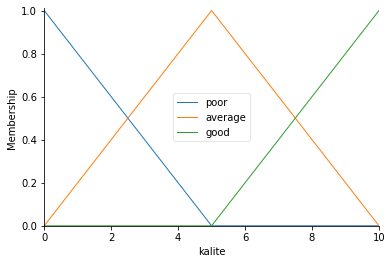

In [23]:
kalite.view()


C:\Users\omerk\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


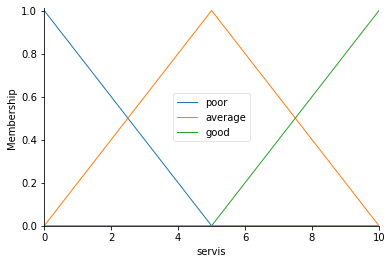

In [24]:
servis.view()

C:\Users\omerk\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


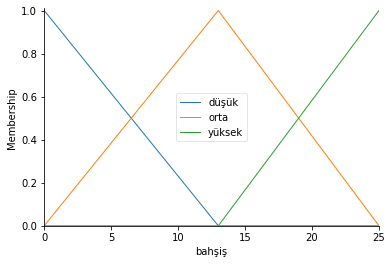

In [25]:
bahşiş.view()

In [26]:
kural1 = ctrl.Rule(kalite["good"], servis["good"],bahşiş["yüksek"])
kural2 = ctrl.Rule(servis["average"], bahşiş["orta"])
kural3 = ctrl.Rule(servis["poor"], kalite["poor"],bahşiş["düşük"])

In [31]:
bahşişKontrol = ctrl.ControlSystem([kural1, kural2, kural3])
bahşişBelirleme = ctrl.ControlSystemSimulation(bahşişKontrol)

In [32]:
bahşişBelirleme.input["kalite"]=3.2
bahşişBelirleme.input["servis"]=2.4
bahşişBelirleme.compute()
print(bahşişBelirleme.output["bahşiş"])

AttributeError: 'Antecedent' object has no attribute 'accumulation_method'

C:\Users\omerk\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


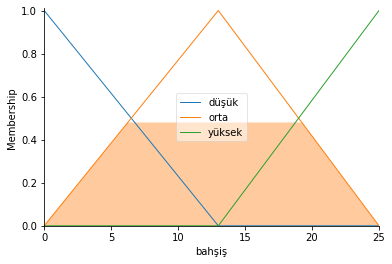

In [33]:
bahşiş.view(sim=bahşişBelirleme)